## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

## Perform cleaning on the dataset (detailed steps already carried out in the Telco Data Analysis Notebook)

In [3]:
df['TotalCharges']=df['TotalCharges'].str.replace(' ','0').astype('float64')
df.SeniorCitizen=df.SeniorCitizen.map({0:'No',1:'Yes'})

## List the wanted column ( to be used for plotting table in the report) 

In [4]:
wanted=['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
wanted

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

## Create an empty dataframe, table. Apply groupby method on each column alongside churn column, getting the size and assigning it to a variable each. Calculate the total people in dataset assigning it to a variable total.  Merge total  to each assigning it to a new variable data then create a new column in data calculating the percentage. Filter data by those that churned and assigning it to a variable churn_table, manipulate churn_table to a suitable format and merge for each iteration to the initially empty dataframe created.

In [5]:
table=pd.DataFrame()
for column in wanted:
    each=df.groupby([column,'Churn']).size().reset_index(name='count')
    total=each.groupby([column]).sum().reset_index().rename({'count':'sum'},axis=1)
    data=each.merge(total,how='outer')
    data['percentage']=round(100*data['count']/data['sum'],2)
    churn_table=data[data['Churn']=='Yes']
    churn_table=churn_table[[column,'percentage']]
    churn_table=churn_table.set_index(column).transpose()
    churn_table['Category']=column
    if len(table)==0:
        table=churn_table
    else:
        table=table.merge(churn_table,how='outer')
table

,No,Yes,Category,No internet service
0,23.61,41.68,SeniorCitizen,NaN
1,32.96,19.66,Partner,NaN
2,31.28,15.45,Dependents,NaN
3,24.93,26.71,PhoneService,NaN
4,41.77,14.61,OnlineSecurity,7.4
5,39.93,21.53,OnlineBackup,7.4
6,39.13,22.50,DeviceProtection,7.4
7,41.64,15.17,TechSupport,7.4
8,33.52,30.07,StreamingTV,7.4
9,33.68,29.94,StreamingMovies,7.4


## Filter out the needed column, fill nan values with ''(empty strings) and convert to numpy(to make it easy to plot the table)

In [6]:
table=table[['Category','No','Yes','No internet service']]

table=table.fillna('')

table_data=table.to_numpy()
table

,Category,No,Yes,No internet service
0,SeniorCitizen,23.61,41.68,
1,Partner,32.96,19.66,
2,Dependents,31.28,15.45,
3,PhoneService,24.93,26.71,
4,OnlineSecurity,41.77,14.61,7.4
5,OnlineBackup,39.93,21.53,7.4
6,DeviceProtection,39.13,22.50,7.4
7,TechSupport,41.64,15.17,7.4
8,StreamingTV,33.52,30.07,7.4
9,StreamingMovies,33.68,29.94,7.4


## Get the columns to use for the plot and manipulating it to taste

In [7]:
table_column=[]
for i in table.columns: 
    if i != 'Category':
        table_column.append(i+ '\n (%)')
    else:
        table_column.append(i)
    

## A string variable discovery, also to be used in the plot

In [8]:
discovery='''1. Price Sensitivity: Customers churned 
majorly due to price concerns. The cost of
services offered by Telco is a significant
factor influencing customer decisions to 
stay or leave.
2. Service Utilization: Customers who use
multiple services (phone and internet) are
more likely to be affected by price 
changes, potentially leading to higher 
churn rates.
3. Dependents and Partners: Customers 
with partners or dependents are less likely 
to churn since they find the Telco service
more essential for communication.
4. Senior Citizens vs. Non-Senior Citizens: 
While senior citizens have a higher churn 
rate compared to their total number, 
non-senior citizens contribute more to the
overall churn due to their larger share
of the customer base.
5. Internet Service and Add-ons: Customers
might not be fully aware of or appreciate 
the value of add-ons like online security, 
backup, and device protection,leading to 
higher churn rates.
6. Electronic Check Payment Method: Issues
with the electronic check payment method 
might be affecting customer satisfaction 
and contributing to churn.
7. Long-Term Contracts: Customers on 
short-term contracts are more likely to 
churn, necessitating strategies to 
encourage long-term contracts.
8. DSL Internet Service: Customers using 
Fiber Optic Internet Service might be more
prone to churn due to its higher cost,
which could be mitigated by suggesting 
DSL internet service.
9. Paperless Billing: Problems with
paperless billing might lead to unnecessary
charges or confusion among customers, 
impacting churn rates.'''

## The Dashboard Plotting

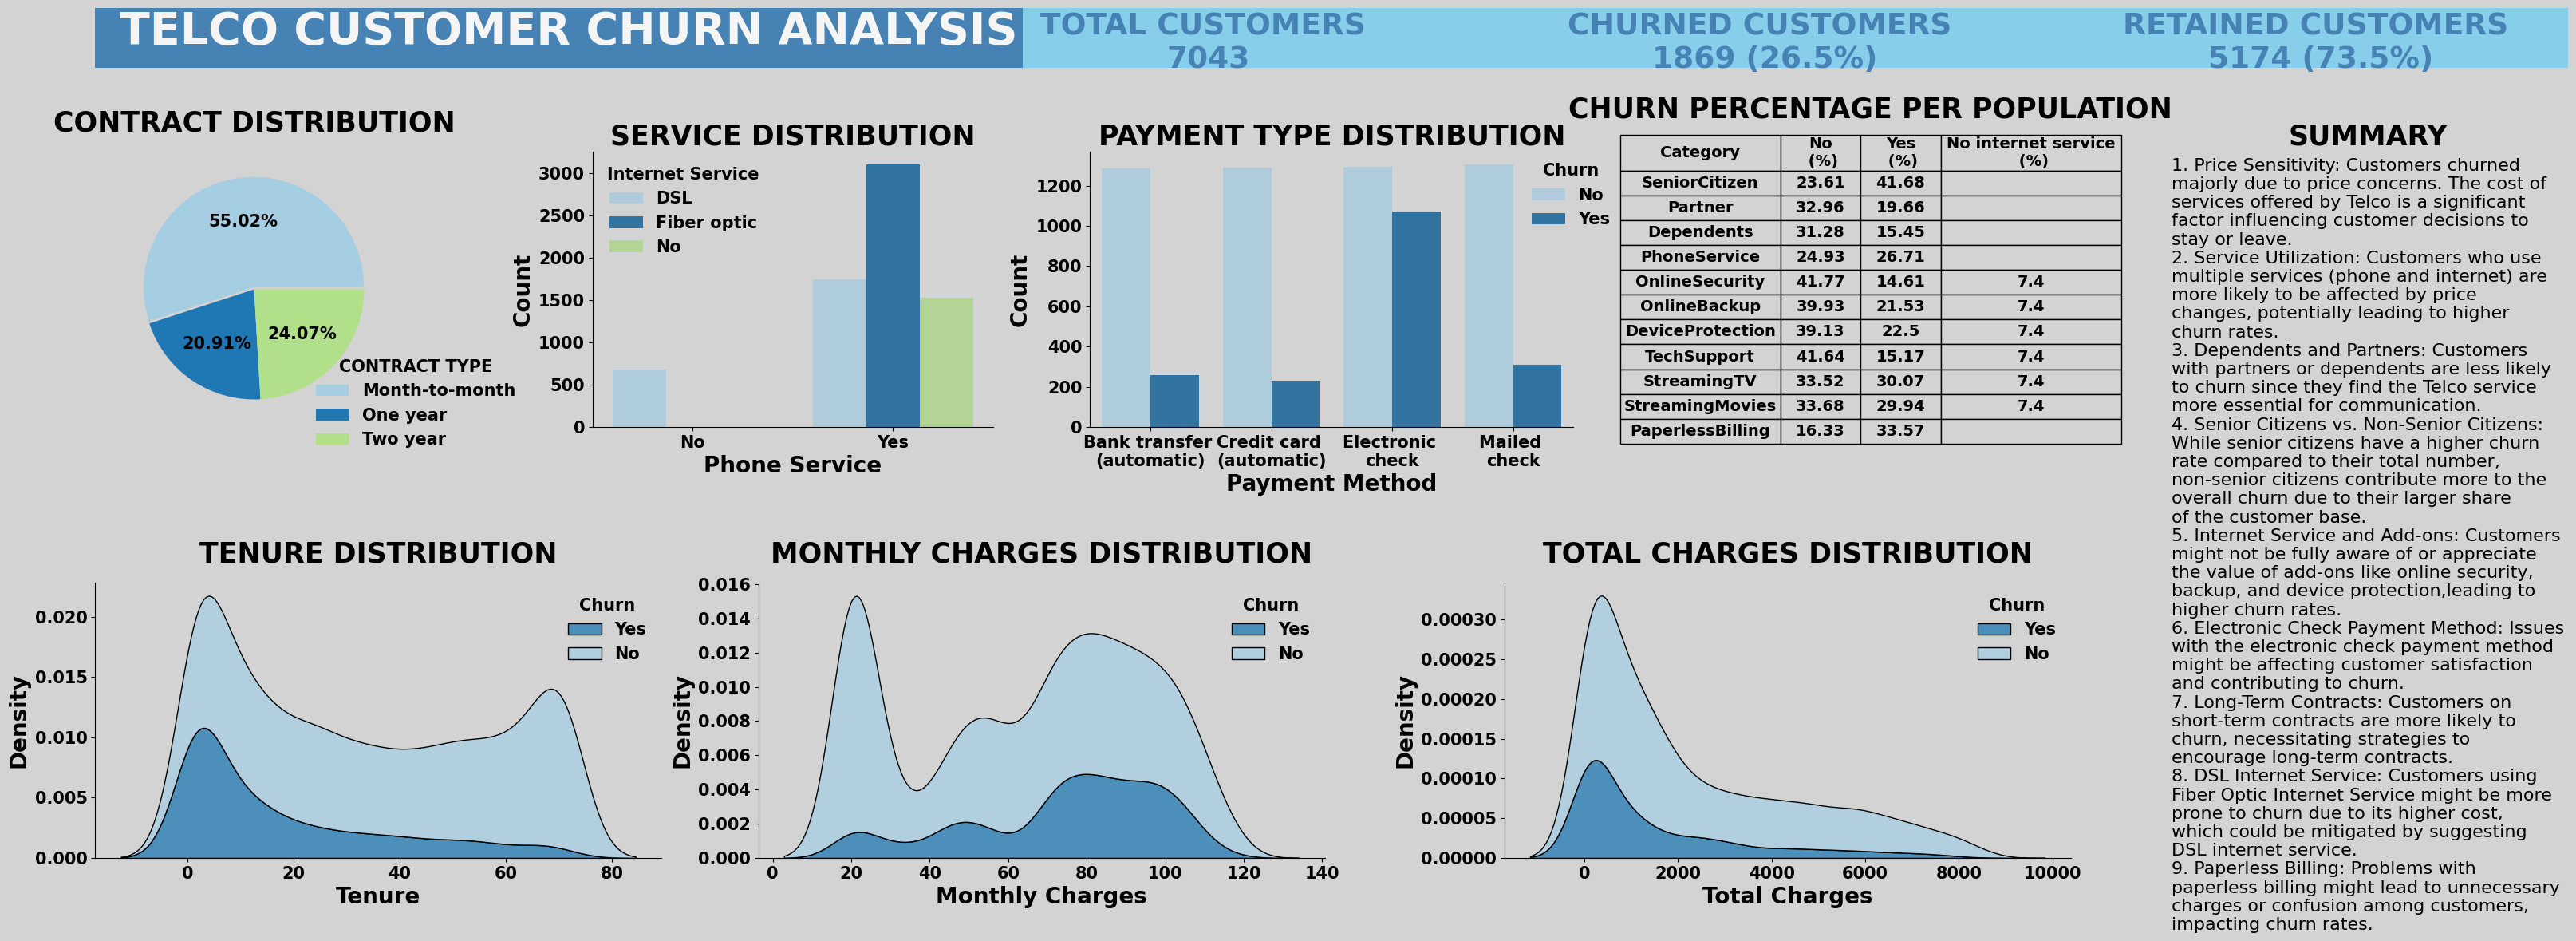

In [9]:
# create a figure for the dashboard
fig = plt.figure(figsize=(40,15),facecolor='lightgrey')

#add a gridspec for indexing position to plot 
spec = fig.add_gridspec(13,30)

# create a subplot for title
title = fig.add_subplot(spec[0,:],facecolor='steelblue')

#remove spines in the axis
title.spines.top.set_visible(None)
title.spines.left.set_visible(None)
title.spines.right.set_visible(None)
title.spines.bottom.set_visible(None)

#remove ticks on axis
title.set_xticks([])
title.set_yticks([])

#create a rectangle shape to add design to the title
rec = plt.Rectangle((0.375,0), height = 1, width = 1, fc = 'skyblue')

#add the rectangle to patch 
title.add_patch(rec)


#write title of the dashboard
plt.text(0.01,0.4,'TELCO CUSTOMER CHURN ANALYSIS', color = 'whitesmoke', size = 40, weight='bold')


#calculate variables needed 
total_customers=len(df)
retained_customers=sum(df.Churn=='No')
churned_customers=sum(df.Churn=='Yes')
churn_percent=churned_customers*100/total_customers
retain_percent=retained_customers*100/total_customers

#from the variables calculated, create text and their corresponding value in the dataset
plt.text(0.45,0,f'TOTAL CUSTOMERS \n{total_customers}',size=27,ha='center',weight='bold',color='steelblue')


plt.text(0.675,0,f'CHURNED CUSTOMERS \n{churned_customers} ({round(churn_percent,1)}%)',size=27,ha='center',
         weight='bold',color='steelblue')


plt.text(0.9,0,f'RETAINED CUSTOMERS \n{retained_customers} ({round(retain_percent,1)}%)',size=27,ha='center',
         weight='bold',color='steelblue')





# color palette to use for the plot
sns.set_palette('Paired')





#create a subplot for contract
contract=fig.add_subplot(spec[2:6,0:4])

#give it a title
plt.title('CONTRACT DISTRIBUTION',size=25,weight='bold',y=1.05)

#draw pie chart
df.groupby(['Contract']).size().plot(kind='pie',labels=None,ylabel='',autopct='%.2f%%',explode=[0.02,0,0],
                                     textprops={'fontsize':15,'weight':'bold'},ax=contract)
#customise legend
plt.legend(title='CONTRACT TYPE',labels=df.Contract.unique(),title_fontproperties={'size':15,'weight':'bold'},
           prop={'size':15,'weight':'bold'},frameon=False,loc=(0.7,-0.1))



#create a subplot for service
service=fig.add_subplot(spec[2:6,6:11])

#give it a title
plt.title('SERVICE DISTRIBUTION',size=25,weight='bold')

#calculate the data for the plot(those using phone service,internet service and both)
data=df.groupby(['PhoneService','InternetService']).size().reset_index(name='count')

#make the plot 
sns.barplot(data=data,x='PhoneService',y='count',hue='InternetService')

#customise legend
plt.legend(title='Internet Service',loc='upper left',title_fontproperties={'size':15,'weight':'bold'}
           ,prop={'size':15,'weight':'bold'},frameon=False)

#customise the axis
plt.xticks(size=15,weight='bold')
plt.yticks(size=15,weight='bold')
plt.xlabel(xlabel='Phone Service',size=20,weight='bold')
plt.ylabel(ylabel='Count',size=20,weight='bold')

#set face color to figure face color and remove some spine on the axis
service.set_facecolor('lightgrey')
service.spines.top.set_visible(False)
service.spines.right.set_visible(False)




#create a subplot for service
payment=fig.add_subplot(spec[2:6,12:18])

#give it a title
plt.title('PAYMENT TYPE DISTRIBUTION',size=25,weight='bold')

#query the data for the plot
data=df.groupby(['PaymentMethod','Churn']).size().reset_index(name='Count')

#make the plot
sns.barplot(data=data,x='PaymentMethod',y='Count',hue='Churn')

#get the values of xlabel, manipulate so as it renders properly
xlabel=data.PaymentMethod.str.replace('(','\n(',regex=False)
xlabel=xlabel.str.replace('check','\ncheck',regex=False).unique()

#customise the axis
plt.xticks(ticks=range(len(xlabel)),labels=xlabel,size=15,weight='bold')
plt.yticks(size=15,weight='bold')
plt.xlabel(xlabel='Payment Method',size=20,weight='bold')
plt.ylabel(ylabel='Count',size=20,weight='bold')

#customise the legend
plt.legend(title='Churn',title_fontproperties={'size':15,'weight':'bold'},prop={'size':15,'weight':'bold'},
           frameon=False,loc=(0.9,0.7))

#set face color to figure face color and remove some spine on the axis
payment.set_facecolor('lightgrey')
payment.spines.top.set_visible(False)
payment.spines.right.set_visible(False)



#create subplot for table
table=fig.add_subplot(spec[2:6,19:24])

#give it a title
plt.title('CHURN PERCENTAGE PER POPULATION',size=25,y=1.1,weight='bold')

#plot the table
sheet=plt.table(cellText=table_data,colLabels=table_column,colWidths=[0.4,0.2,0.2,0.45] ,cellLoc='center',loc='center')

#get the position of each cell
cellDict=sheet.get_celld()

#loop through the position of and edit the height, fontweight and facecolor
for i in range(0,len(table_column)):
    cellDict[(0,i)].set_height(0.13)
    cellDict[(0,i)].set_text_props(fontproperties=FontProperties(weight='bold'))
    cellDict[(0,i)].set_facecolor('lightgrey')
    for j in range(1,len(table_data)+1):
        cellDict[(j,i)].set_height(0.09)
        cellDict[(j,i)].set_text_props(fontproperties=FontProperties(weight='bold'))
        cellDict[(j,i)].set_facecolor('lightgrey')

#disable  auto set font size and set preferrable fontsize
sheet.auto_set_font_size(False)      
sheet.set_fontsize(14)

#remove axis from table
table.axis('off')






#create subplot for tenure
tenure=fig.add_subplot(spec[8:12,0:7])

#give it a title
plt.title('TENURE DISTRIBUTION',size=25,weight='bold',y=1.05)

#make the plot
sns.kdeplot(data=df,x='tenure',hue='Churn',fill=True,multiple='stack')

#customise the axis
plt.yticks(size=15,weight='bold')
plt.xticks(size=15,weight='bold')
plt.xlabel(xlabel='Tenure',size=20,weight='bold')
plt.ylabel(ylabel='Density',size=20,weight='bold') 

#customise the legend
plt.legend(title='Churn',title_fontproperties={'size':15,'weight':'bold'},labels=['Yes','No'],
           prop={'size':15,'weight':'bold'},frameon=False)

#set face color to figure face color and remove some spine on the axis
tenure.set_facecolor('lightgrey')
tenure.spines.top.set_visible(False)
tenure.spines.right.set_visible(False)




#create monthly_charge subplot
monthly_charge=fig.add_subplot(spec[8:12,8:15])

#give it a title
plt.title('MONTHLY CHARGES DISTRIBUTION',size=25,weight='bold',y=1.05)

#make the plot
sns.kdeplot(data=df,x='MonthlyCharges',hue='Churn',fill=True,multiple='stack')

#customise the axis
plt.yticks(size=15,weight='bold')
plt.xticks(size=15,weight='bold')
plt.xlabel(xlabel='Monthly Charges',size=20,weight='bold')
plt.ylabel(ylabel='Density',size=20,weight='bold')

#customise the legend
plt.legend(title='Churn',title_fontproperties={'size':15,'weight':'bold'},labels=['Yes','No'],
           prop={'size':15,'weight':'bold'},frameon=False)

#set face color to figure face color and remove some spine on the axis
monthly_charge.set_facecolor('lightgrey')
monthly_charge.spines.top.set_visible(False)
monthly_charge.spines.right.set_visible(False)





#create subplot for total_charge
total_charge=fig.add_subplot(spec[8:12,17:24])

#give it a title
plt.title('TOTAL CHARGES DISTRIBUTION',size=25,weight='bold',y=1.05)

#make the plot
sns.kdeplot(data=df,x='TotalCharges',hue='Churn',fill=True,multiple='stack')

#customise the axis
plt.yticks(size=15,weight='bold')
plt.xticks(size=15,weight='bold')
plt.xlabel(xlabel='Total Charges',size=20,weight='bold')
plt.ylabel(ylabel='Density',size=20,weight='bold')

#customise the legend
plt.legend(title='Churn',title_fontproperties={'size':15,'weight':'bold'},labels=['Yes','No'],
           prop={'size':15,'weight':'bold'},frameon=False)

#set face color to figure face color and remove some spine on the axis
total_charge.set_facecolor('lightgrey')
total_charge.spines.top.set_visible(False)
total_charge.spines.right.set_visible(False)







#create a subplot for recommendation
recommendation=fig.add_subplot(spec[2:13,25:])

#give it a title
plt.title('SUMMARY',size=25,weight='bold',y=1)

#delete its axis
recommendation.axis('off')

#plot the text
plt.text(0.01,0,discovery,size=16)

#set face color to figure face color and remove some spine on the axis
recommendation.set_facecolor('lightgrey')
recommendation.spines.top.set_visible(False)
recommendation.spines.right.set_visible(False)



#save the plot as dashboard.png
plt.savefig('dashbboard.png',bbox_inches='tight')


#display the plot
plt.show()